# Part II - (Ford Gobike trip data)
## by (Dikshith Ravi Kumar)

## Investigation Overview


The goal of this presentation is to get insights about commute hours per user type and Week day.

## Dataset Overview and Executive Summary

The dataset being used is from Ford Gobike trips data from February 2019. It has 174952 Rows of data after data wrangling. It contains customer type, age, sex, start, end station and trip duration

In [13]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [14]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('new_df.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_month,start_day_of_week,start_hour,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984,Male,No,35,February,Thursday,17,869.750000
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972,Male,No,47,February,Thursday,12,1030.900000
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989,Other,No,30,February,Thursday,17,608.166667
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974,Male,Yes,45,February,Thursday,23,26.416667
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959,Male,No,60,February,Thursday,23,29.883333


## (Visualization 1)

> The below visualization shows the number of rides per hour.
1) Peak time for bike rental is 8 and 17'o clock.
2) We can assume this might be due to people commuting to and from work.
3) Bike rental is more during day time than night time.

Text(0, 0.5, 'number of rides')

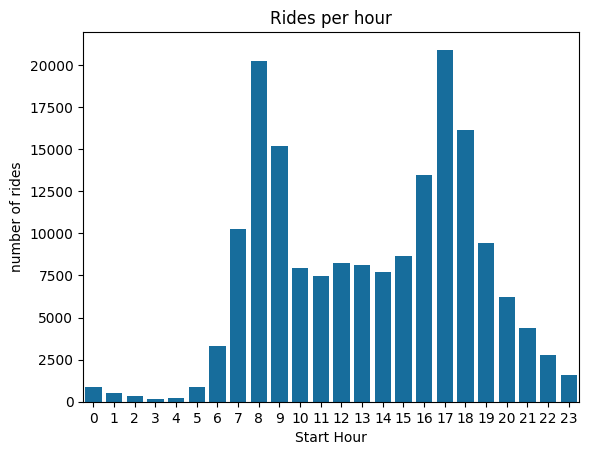

In [15]:
#Q1 : What is the most common time of bike rent?
base_color= sns.color_palette('colorblind')[0]
sns.countplot(data=df, x= 'start_hour', color=base_color)
plt.title('Rides per hour')
plt.xlabel('Start Hour')
plt.ylabel('number of rides')

## (Visualization 2)

> The below visualization shows the mean hour of the trips perday.
1) The mean hour of bke rental is around 15 'o clock.
2) This gives an idea to the retal company that they need to keep the bikes ready between 10-15 'o clock.

Text(0, 0.5, 'Start Hour')

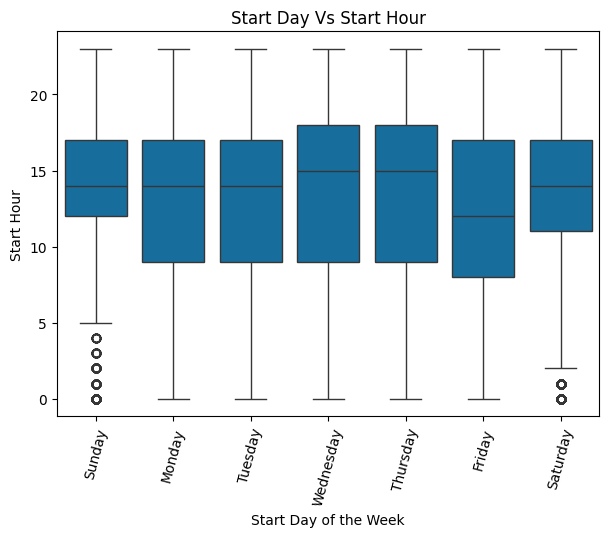

In [16]:
# Q2: What is the mean hour in week?
week_days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.figure(figsize=[7,5])
sns.boxplot(data=df,x='start_day_of_week',y='start_hour',color=base_color,order = week_days)
plt.xticks(rotation=75)
plt.title('Start Day Vs Start Hour')
plt.xlabel('Start Day of the Week')
plt.ylabel('Start Hour')

## (Visualization 3)

> The below visualization shows the user the rental count per user type.
1) All user types rent more bikes on Thursday.
2) Subscribers rent more bikes than other customers.
3) this sows subscribers are loyal to rental bike company.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

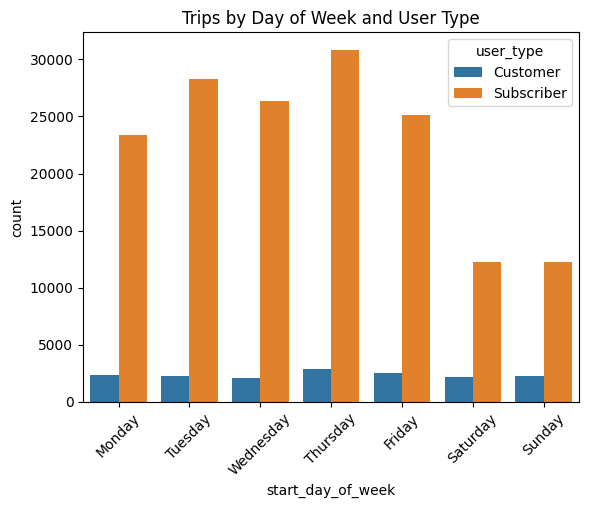

In [17]:
#Q3: On which day, which user type rent more bike?
sns.countplot(x='start_day_of_week', hue='user_type', data=df,
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Trips by Day of Week and User Type')
plt.xticks(rotation=45)

## (Visualization 4)

> The below visualization shows the duration of user type.
1) All user types ride for more hours on saturday and sunday.
2) We can assume that due to weekend people might be using the bikes for leisure and fun .

Text(0.5, 1.0, 'Day vs Duration vs User Type')

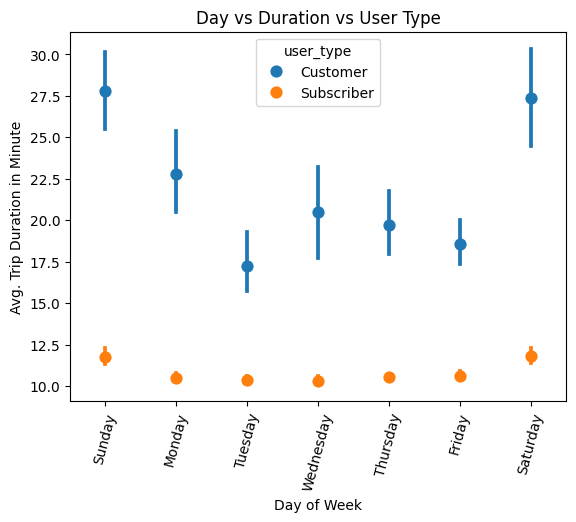

In [19]:
#Q4: Riding duration per day and user
sns.pointplot(data=df, x='start_day_of_week', y='duration_min', hue='user_type' , linestyles="", order = week_days);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute')
plt.xticks(rotation=75)
plt.title('Day vs Duration vs User Type')

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_II_notebook.html or pdf


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
